# Q-learning Method

## Prepare the packages

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [3]:
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define Q-learning Agent

In [4]:
class QLearningAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=100000, gamma=0.9,
              learning_rate=0.1,
              render=False, report_interval=100):
        self.init_log()
        self.Q = defaultdict(lambda: [0] * len(actions))
        actions = list(range(env.action_space.n))
        for e in range(episode_count):
            s = env.reset()
            done = False
            while not done:
                if render:
                    env.render()
                a = self.policy(s, actions)
                n_state, reward, done, info = env.step(a)

                gain = reward + gamma * max(self.Q[n_state])
                estimated = self.Q[s][a]
                self.Q[s][a] += learning_rate * (gain - estimated)
                s = n_state

            else:
                self.log(reward)

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

## Train Agent

In [5]:
def train():
    agent = QLearningAgent()
    env = gym.make("FrozenLakeEasy-v0")
    agent.learn(env, episode_count=3000)
    show_q_value(agent.Q)
    agent.show_reward_log()

At Episode 100 average reward is 0.38 (+/-0.485).
At Episode 200 average reward is 0.86 (+/-0.347).
At Episode 300 average reward is 0.89 (+/-0.313).
At Episode 400 average reward is 0.91 (+/-0.286).
At Episode 500 average reward is 0.85 (+/-0.357).
At Episode 600 average reward is 0.94 (+/-0.237).
At Episode 700 average reward is 0.94 (+/-0.237).
At Episode 800 average reward is 0.94 (+/-0.237).
At Episode 900 average reward is 0.9 (+/-0.3).
At Episode 1000 average reward is 0.89 (+/-0.313).
At Episode 1100 average reward is 0.89 (+/-0.313).
At Episode 1200 average reward is 0.9 (+/-0.3).
At Episode 1300 average reward is 0.88 (+/-0.325).
At Episode 1400 average reward is 0.95 (+/-0.218).
At Episode 1500 average reward is 0.91 (+/-0.286).
At Episode 1600 average reward is 0.86 (+/-0.347).
At Episode 1700 average reward is 0.93 (+/-0.255).
At Episode 1800 average reward is 0.91 (+/-0.286).
At Episode 1900 average reward is 0.88 (+/-0.325).
At Episode 2000 average reward is 0.89 (+/-0.3

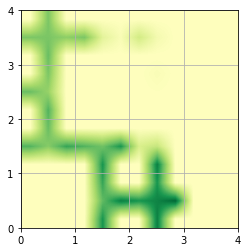

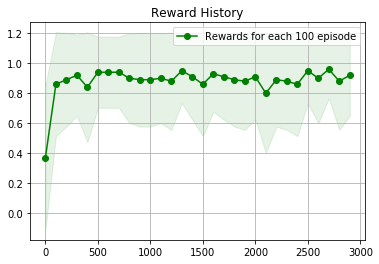

In [6]:
agent = train()